# 1) Probleme Genel Bakış

# 2) Veriyi Toplama

#https://www.kaggle.com/datasets/himanshunakrani/student-study-hours

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("score.csv")

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# 3) Veriyi İnceleme ve Görselleştirme

In [4]:
df.shape

(25, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
import matplotlib.pyplot as plt

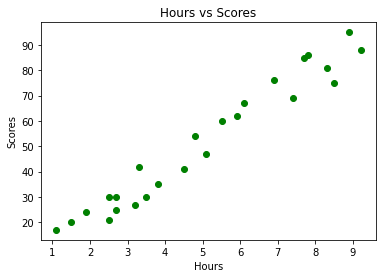

In [7]:
plt.scatter(x=df['Hours'], y=df['Scores'], color="green")

plt.xlabel("Hours")
plt.ylabel("Scores")

plt.title("Hours vs Scores")
plt.show()

# 4) Veriyi Model Uygun Hale Getirme

In [8]:
X = df["Hours"]
y = df["Scores"]

In [9]:
X

0     2.5
1     5.1
2     3.2
3     8.5
4     3.5
5     1.5
6     9.2
7     5.5
8     8.3
9     2.7
10    7.7
11    5.9
12    4.5
13    3.3
14    1.1
15    8.9
16    2.5
17    1.9
18    6.1
19    7.4
20    2.7
21    4.8
22    3.8
23    6.9
24    7.8
Name: Hours, dtype: float64

In [10]:
y

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

In [11]:
import sklearn.model_selection

In [12]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, train_size=0.8)

In [13]:
print(X_train)

24    7.8
8     8.3
16    2.5
1     5.1
6     9.2
5     1.5
19    7.4
23    6.9
9     2.7
17    1.9
21    4.8
18    6.1
11    5.9
10    7.7
22    3.8
13    3.3
12    4.5
4     3.5
15    8.9
20    2.7
Name: Hours, dtype: float64


In [14]:
print(y_train)

24    86
8     81
16    30
1     47
6     88
5     20
19    69
23    76
9     25
17    24
21    54
18    67
11    62
10    85
22    35
13    42
12    41
4     30
15    95
20    30
Name: Scores, dtype: int64


In [15]:
print(X_test)

0     2.5
14    1.1
3     8.5
7     5.5
2     3.2
Name: Hours, dtype: float64


In [16]:
import numpy as np

In [17]:
X_train.shape

(20,)

In [18]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [19]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [20]:
X_train = X_train.reshape(-1,1) 
X_test = X_test.reshape(-1,1) 


In [21]:
y_train = y_train.reshape(-1,1) 
y_test = y_test.reshape(-1,1) 

In [22]:
print(X_train.shape)
print(X_test.shape)

(20, 1)
(5, 1)


#5) Model Seçimi ve Modelin Eğitilmesi

In [23]:
import sklearn.linear_model

In [24]:
lin_model = sklearn.linear_model.LinearRegression()

In [25]:
lin_model.fit(X_train, y_train)

LinearRegression()

# 6) Modelin Optimize Edilmesi

In [26]:
from sklearn.metrics import mean_absolute_error

In [27]:
predictions = lin_model.predict(X_test)

In [28]:
X_test[-1]

array([3.2])

In [29]:
print(predictions)

[[27.25307989]
 [13.33172644]
 [86.91602325]
 [57.08455157]
 [34.21375661]]


In [30]:
for i in range(len(X_test)):
    print(f"{i}: Gerçek Değer : {y_test[i]} - Tahmin: {predictions[i]}")

0: Gerçek Değer : [21] - Tahmin: [27.25307989]
1: Gerçek Değer : [17] - Tahmin: [13.33172644]
2: Gerçek Değer : [75] - Tahmin: [86.91602325]
3: Gerçek Değer : [60] - Tahmin: [57.08455157]
4: Gerçek Değer : [27] - Tahmin: [34.21375661]


In [31]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [32]:
r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

In [33]:
print(f"r2: {r2}")
print(f"MAE: {mae}")
print(f"mse: {mse}")


r2: 0.9049601440955416
MAE: 6.39331634985956
mse: 51.01739464951326


In [34]:
score_tahmini = lin_model.predict([[5]])

In [35]:
print(score_tahmini)

[[52.11263962]]


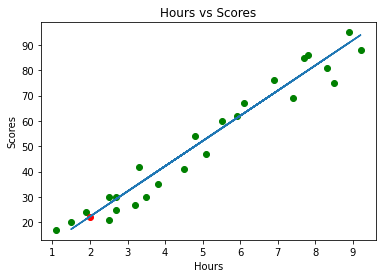

In [36]:
X_predictions = lin_model.predict(X_train)

plt.scatter(x=df['Hours'], y=df['Scores'], color="green")
plt.plot(X_train, X_predictions)
plt.scatter(x = 2, y=lin_model.predict([[2]]), color = "red")

plt.xlabel("Hours")
plt.ylabel("Scores")

plt.title("Hours vs Scores")
plt.show()